In [49]:
import numpy as np
import cv2
import tree2
import os
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

def show(img, cvt=cv2.COLOR_GRAY2RGB, do_cvt=True):
    plt.figure(figsize=(10,10))
    if do_cvt:
        plt.imshow(cv2.cvtColor(img, cvt))
    else:
        plt.imshow(img)


In [53]:
reload(tree2)

<module 'tree2' from 'tree2.py'>

In [3]:
files = [os.path.join("images", fn) for fn in os.listdir("images")]
print files

['images/tree_image_ref.png', 'images/Tree1.png', 'images/sample_tree.png', 'images/Tree2.png']


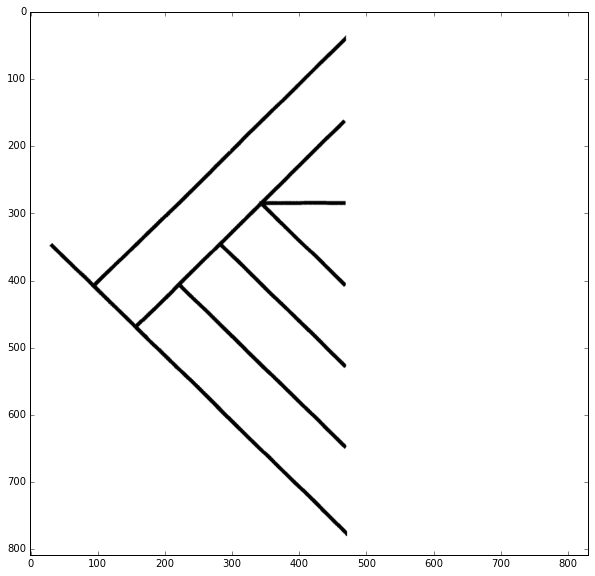

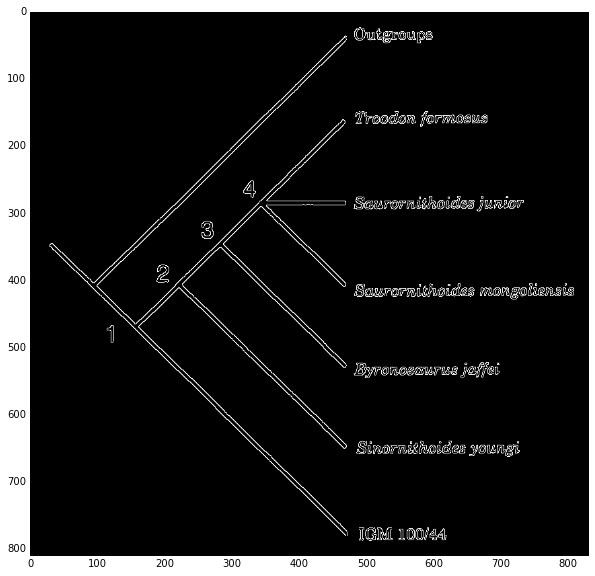

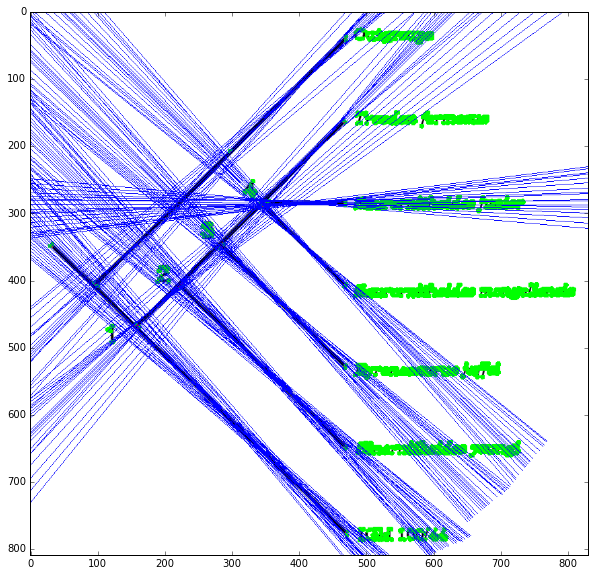

In [55]:
# def foo(fn='images/Tree1.png'):
fn='images/Tree1.png'
img = cv2.imread(fn)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

contour = tree2.find_tree_contour(gray)
points = tree2.get_points(img)

scratch = img.copy()

show(contour)
for point in points:
    try:
        if not contour[point]:
            scratch[point] = [255,0,0]
        else:
            scratch[point] = [0,255,0]
    except:
        print point
        
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(cv2.bitwise_not(contour),1,np.pi/180,100)

for l in lines:
    for rho,theta in l:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(scratch,(x1,y1),(x2,y2),(0,0,255),1)
        
show(edges)
show(scratch,False)

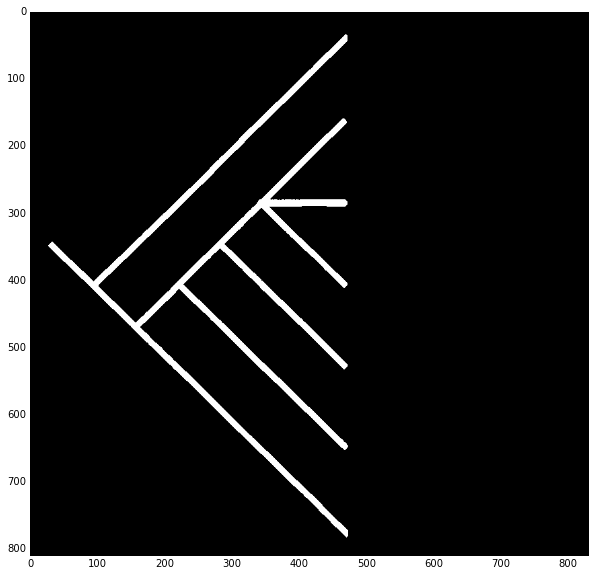

In [44]:
show(cv2.bitwise_not(contour))

In [14]:
tree2.find_tree_contour(gray)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [58]:
import ete2
t = ete2.TreeNode('((((Hi,Kappa)D,(F,I)G)B,E)A,((L,(N,Q)O)J,(P,S)M)C);', format=1)
t.show()